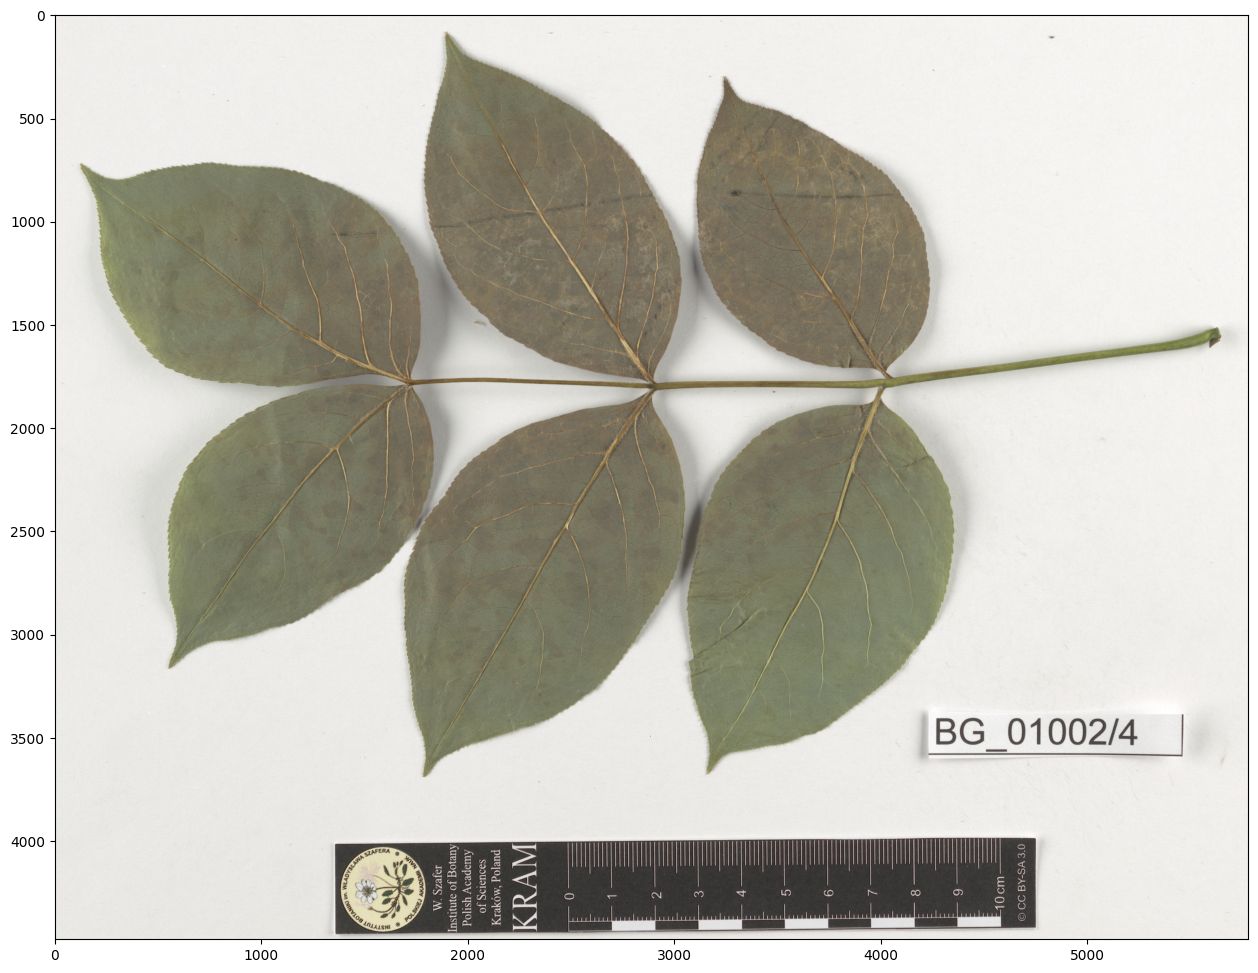

In [1]:
import cv2
import matplotlib.pyplot as plt
import tifffile as tf
import numpy as np

path = "Dane/BG_0014.tif"

image_bgr = tf.imread(path)

# To speed up
# image_bgr = image_bgr[1500:2000, 1000:1500]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 12)
ax.imshow(image_bgr)

## Generate leaf mask

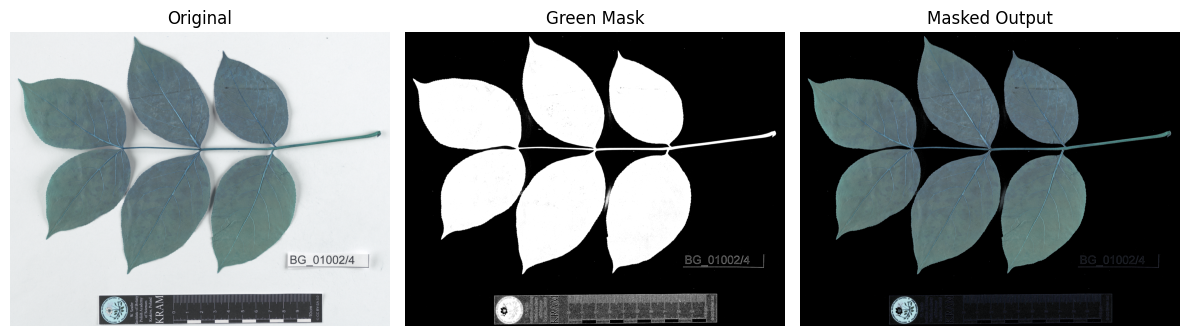

In [2]:
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert for plt (OpenCV loads in BGR)

# Convert RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_yellowgreen = np.array([45, 30, 30])
upper_yellowgreen = np.array([150, 255, 255])

# Threshold the HSV image to get only green colors
color_mask = cv2.inRange(hsv, lower_yellowgreen, upper_yellowgreen)

# kernel_close = np.ones((3, 3))
# color_mask = cv2.morphologyEx(color_mask, cv2.MORPH_CLOSE, kernel_close)
# kernel_open = np.ones((5, 5))
# color_mask = cv2.morphologyEx(color_mask, cv2.MORPH_OPEN, kernel_open)

# Apply the mask
result = cv2.bitwise_and(image, image, mask=color_mask)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Green Mask")
plt.imshow(color_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Masked Output")
plt.imshow(result)
plt.axis('off')

plt.tight_layout()
plt.show()

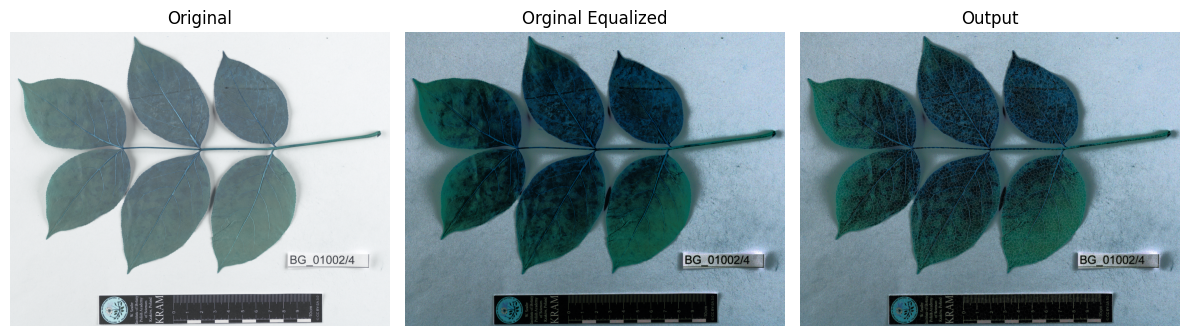

True

In [9]:
# # Convert image to hsv
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hsv_image_equalized = hsv_image.copy()


hsv_image_equalized[:,:, 1] = cv2.equalizeHist(hsv_image[:,:, 1])
hsv_image_equalized[:,:, 2] = cv2.equalizeHist(hsv_image[:,:, 2])

# Create SLIC superpixel segmenter
slic = cv2.ximgproc.createSuperpixelSLIC(image, algorithm=cv2.ximgproc.SLIC, region_size=40, ruler=10.0)

# Run the algorithm
slic.iterate(30)

# Optionally enforce connectivity (useful for small region cleanup)
slic.enforceLabelConnectivity(min_element_size=25)

# Get labels
boundaries_mask = slic.getLabelContourMask(thick_line=True)
# Apply the mask
boundaries_mask = cv2.bitwise_and(boundaries_mask, boundaries_mask, mask=color_mask)

# Draw superpixel boundaries on the original image
image_equalized = cv2.cvtColor(hsv_image_equalized, cv2.COLOR_HSV2RGB)
cv2.imwrite("image_equalized.png", image_equalized)
image_equalized = cv2.cvtColor(hsv_image_equalized, cv2.COLOR_HSV2BGR)

output = image_equalized.copy()

output[boundaries_mask == 255] = (155, 155, 155)  # red boundaries

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Orginal Equalized")
plt.imshow(image_equalized)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Output")
plt.imshow(output)
plt.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite("processed_leaf.png", cv2.cvtColor(output, cv2.COLOR_RGB2BGR))